## Load Module

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # hide warn log information 

import tensorflow as tf                   # model
import numpy as np                        # argmax
import matplotlib.pyplot as plt           # plot images

## Model and Compile

In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28), name='input'),            # 28 * 28 => (784,1)
  tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden_1'),
  tf.keras.layers.Dense(64, activation=tf.nn.relu, name='hidden_2'),
  tf.keras.layers.Dense(32, activation=tf.nn.relu, name='hidden_3'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='output')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 hidden_2 (Dense)            (None, 64)                8256      
                                                                 
 hidden_3 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Without Augmentation

In [4]:
# load mnist dataset
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# scale or normalize the datasets
training_images=training_images/255.0
test_images=test_images/255.0

# print the shape of the dataset
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
his_without_aug = model.fit(training_images, training_labels, epochs=20, 
                            validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2555 - accuracy: 0.9236 - val_loss: 0.1251 - val_accuracy: 0.9608
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1046 - accuracy: 0.9685 - val_loss: 0.1032 - val_accuracy: 0.9694
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0733 - accuracy: 0.9776 - val_loss: 0.0868 - val_accuracy: 0.9725
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0802 - val_accuracy: 0.9751
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0756 - val_accuracy: 0.9771
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0865 - val_accuracy: 0.9773
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0846 - val_accur

In [6]:
results = model.evaluate(test_images, test_labels)

print("Loss       : {}".format(results[0]))
print("Accuracy   : {}".format(results[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9800
Loss       : 0.10993441194295883
Accuracy   : 0.9800000190734863


## Perform Image Augmentation

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    zoom_range=.1,
    width_shift_range=.1,
    height_shift_range=.1,
    shear_range=.1,
)

# data generator to the training data using the datagen.fit()
datagen.fit(training_images.reshape(-1, 28,28,1))

# generates new images on the fly as the model is being trained. We then pass this iterator to the 
# model.fit() method to train the model using the augmented data.
augmented_iterator = datagen.flow(training_images.reshape(-1,28,28,1), 
                                  training_labels, batch_size=32)

In [10]:
his_with_aug = model.fit(augmented_iterator, epochs=20, validation_data=(test_images.reshape(-1,28,28,1), test_labels))

Epoch 1/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2085 - accuracy: 0.9373 - val_loss: 0.0662 - val_accuracy: 0.9786
Epoch 2/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1772 - accuracy: 0.9456 - val_loss: 0.0687 - val_accuracy: 0.9787
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1615 - accuracy: 0.9499 - val_loss: 0.0627 - val_accuracy: 0.9800
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1472 - accuracy: 0.9547 - val_loss: 0.0711 - val_accuracy: 0.9779
Epoch 5/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1390 - accuracy: 0.9575 - val_loss: 0.0606 - val_accuracy: 0.9806
Epoch 6/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1322 - accuracy: 0.9604 - val_loss: 0.0574 - val_accuracy: 0.9814
Epoch 7/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1240 - accuracy: 0.9622 - val_loss: 0.0541 -

In [11]:
results = model.evaluate(test_images, test_labels)

print("Loss       : {}".format(results[0]))
print("Accuracy   : {}".format(results[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9867
Loss       : 0.0463283434510231
Accuracy   : 0.9866999983787537


## Compare by plot

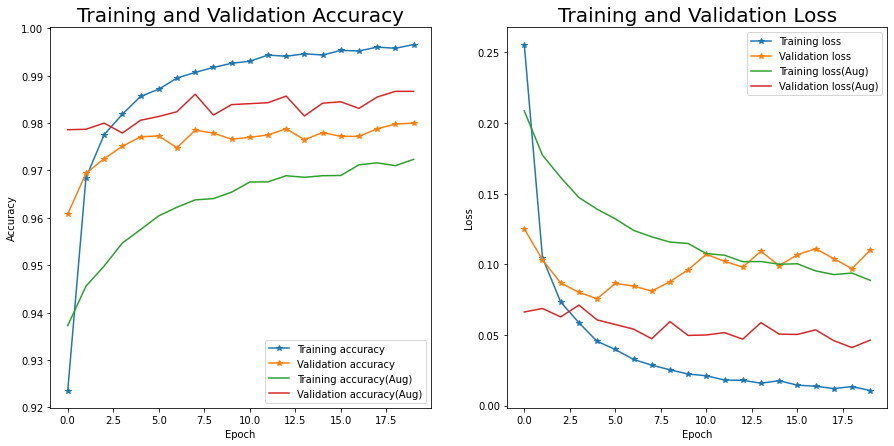

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the training and validation loss
ax2.plot(his_without_aug.history['loss'], marker = '*', label='Training loss')
ax2.plot(his_without_aug.history['val_loss'], marker = '*', label='Validation loss')

ax2.plot(his_with_aug.history['loss'], label='Training loss(Aug)')
ax2.plot(his_with_aug.history['val_loss'], label='Validation loss(Aug)')


ax2.set_title('Training and Validation Loss', fontsize=20)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Plot the training and validation accuracy
ax1.plot(his_without_aug.history['accuracy'], marker = '*', label='Training accuracy')
ax1.plot(his_without_aug.history['val_accuracy'], marker = '*', label='Validation accuracy')

ax1.plot(his_with_aug.history['accuracy'], label='Training accuracy(Aug)')
ax1.plot(his_with_aug.history['val_accuracy'], label='Validation accuracy(Aug)')


ax1.set_title('Training and Validation Accuracy', fontsize=20)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

plt.show()

### Comment: With augmentation - validation accuracy is high and validation is low. 